In [ ]:
!pip install ultralytics

100%|██████████| 6.25M/6.25M [00:04<00:00, 1.42MB/s]



0: 384x640 (no detections), 52.0ms
Speed: 4.0ms preprocess, 52.0ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.5ms
Speed: 4.0ms preprocess, 16.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms
Speed: 0.0ms preprocess, 8.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.2ms
Speed: 0.0ms preprocess, 8.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms
Speed: 0.0ms preprocess, 8.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.0ms
Speed: 0.0ms preprocess, 12.0ms inference,

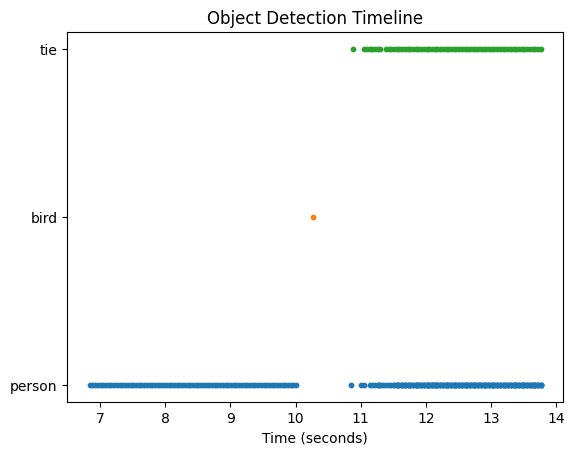

Output video saved to output_video.mp4


In [1]:

import cv2
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO  # Ensure you have the YOLOv8 model installed

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with your model path if necessary

# Path to input video
video_path = 'test_video.mp4'

# Open the input video using OpenCV
cap = cv2.VideoCapture(video_path)

# Get the video details (width, height, frames per second)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the codec and create a VideoWriter object to save the output video
output_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Dictionary to store detection timestamps
detection_timeline = {}

# Process each frame
frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break  # Exit loop if there are no more frames

    # Perform inference on the current frame using YOLOv8
    results = model.predict(source=frame, conf=0.5, device='cuda')  # Using GPU if available
    
    # Extract results and annotations
    for result in results[0].boxes:  # YOLOv8 results
        label = model.names[int(result.cls)]  # Get label for the detected class
        
        # Save the timestamp for this label (frame number / fps gives the time in seconds)
        if label not in detection_timeline:
            detection_timeline[label] = []
        detection_timeline[label].append(frame_num / fps)
    
    # Draw results on the frame (bounding boxes, labels, etc.)
    annotated_frame = results[0].plot()  # results[0] is the first batch of results; use .plot() to get the annotated image
    
    # Write the annotated frame to the output video
    out.write(annotated_frame)

    # Optionally: Show the frame (for debugging)
    # cv2.imshow('YOLOv8 Detection', annotated_frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

    frame_num += 1

# Release video objects
cap.release()
out.release()
cv2.destroyAllWindows()

# Function to display timeline
def show_timeline():
    # Create a timeline plot using matplotlib
    fig, ax = plt.subplots()
    for idx, (label, timestamps) in enumerate(detection_timeline.items()):
        y = [idx] * len(timestamps)
        ax.scatter(timestamps, y, label=label, s=10)  # Mark timestamps on the timeline
    
    # Customize the plot
    ax.set_yticks(np.arange(len(detection_timeline)))
    ax.set_yticklabels(detection_timeline.keys())
    ax.set_xlabel('Time (seconds)')
    ax.set_title('Object Detection Timeline')
    plt.show()

# GUI for showing the timeline
def create_gui():
    root = tk.Tk()
    root.title("Object Detection Timeline")

    label = tk.Label(root, text="Object Detection Completed!", font=("Arial", 16))
    label.pack(pady=10)

    show_button = tk.Button(root, text="Show Timeline", command=show_timeline, font=("Arial", 12))
    show_button.pack(pady=20)

    root.mainloop()

# Call the GUI
create_gui()

print(f'Output video saved to {output_path}')